In [54]:
!pip3 -q install folium 
!pip3 -q install mapclassify

In [107]:
import pandas as pd
import os
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df_task = pd.read_csv('../src2/sa_task_7.csv')

In [36]:
df_sobol = pd.read_csv('../src2/sa_task_7_result_Sobol.csv')

In [40]:
gdf = gpd.GeoDataFrame(data=df_sobol, crs='EPSG:4326',
                       geometry=gpd.points_from_xy(x=df_sobol.lon, y=df_sobol.lat))

<Axes: >

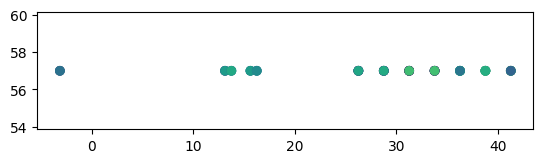

In [41]:
gdf.plot(column='ST')

In [22]:
# df_sobol.loc[~df_sobol['Yield'].isna()]

In [126]:
fnames = os.listdir('../src2/')
sobol_fnames = [file for file in fnames if 'Sobol' in file]

In [129]:
df = pd.DataFrame()
for file in sobol_fnames:
    path=os.path.join('../src2', file)
    df_c = pd.read_csv(path, index_col=0)
    print(df_c.shape)
    df=pd.concat([df, df_c])

(96, 10)
(156, 10)
(234, 10)
(228, 10)
(81, 10)
(237, 10)
(234, 10)
(162, 10)
(9, 10)
(159, 10)


In [134]:
soil_gdf =df.loc[df['soil']=='SLCL']

In [136]:
gdf = gpd.GeoDataFrame(data=df, crs='EPSG:4326',
                       geometry=gpd.points_from_xy(x=df.lon, y=df.lat))

In [137]:
for soil in gdf['soil'].unique():
    soil_gdf = gdf.loc[gdf['soil']==soil]
    soil_gdf.to_file(f'../data/{soil}_sobol.geojson')

In [229]:
soil_gdf

,soil,S1,S1_conf,ST,ST_conf,soil_interaction,S2,S2_conf,lon,lat,geometry
2,SLSI,0.514632,3.050884e-01,0.906134,2.633186e-01,"('SLCL', 'SLSI')",0.339480,6.020460e-01,3.125,49.0,POINT (3.12500 49.00000)
2,SLSI,NaN,NaN,NaN,NaN,"('SLCL', 'SLSI')",NaN,NaN,5.625,49.0,POINT (5.62500 49.00000)
2,SLSI,0.000000,3.964389e+30,1.000000,2.537209e+32,"('SLCL', 'SLSI')",1.984252,5.034774e+32,8.125,49.0,POINT (8.12500 49.00000)
2,SLSI,0.041413,3.021357e-01,1.000000,1.876493e-01,"('SLCL', 'SLSI')",-0.030497,9.912456e-01,10.625,49.0,POINT (10.62500 49.00000)
2,SLSI,0.022697,4.705255e-02,0.926316,6.507268e-01,"('SLCL', 'SLSI')",0.811842,1.207221e+00,13.125,49.0,POINT (13.12500 49.00000)
...,...,...,...,...,...,...,...,...,...,...,...
2,SLSI,-0.273897,2.755915e-01,0.498586,2.005234e-01,"('SLCL', 'SLSI')",0.782996,7.203498e-01,-5.000,40.5,POINT (-5.00000 40.50000)
2,SLSI,-0.053115,1.794838e-01,0.854920,8.112952e-01,"('SLCL', 'SLSI')",0.048145,1.610291e+00,-2.500,40.5,POINT (-2.50000 40.50000)
2,SLSI,0.005457,1.099987e+29,0.695102,2.856779e+30,"('SLCL', 'SLSI')",1.476064,5.621752e+30,21.250,40.5,POINT (21.25000 40.50000)
2,SLSI,0.223156,4.765131e-01,0.597572,5.308858e-01,"('SLCL', 'SLSI')",0.493931,1.101087e+00,23.750,40.5,POINT (23.75000 40.50000)


In [139]:
!ls ../data

SLCL_sobol.geojson  SLOC_sobol.geojson	SLSI_sobol.geojson  soybean_yield.csv


In [102]:
soil_gdf = gdf.loc[gdf['soil']=='SLCL']

In [140]:
soil_gdf['ST'].max()

3.4133333333333318

In [141]:
mask = soil_gdf['ST']>1
soil_gdf.loc[mask, 'ST'] = 1

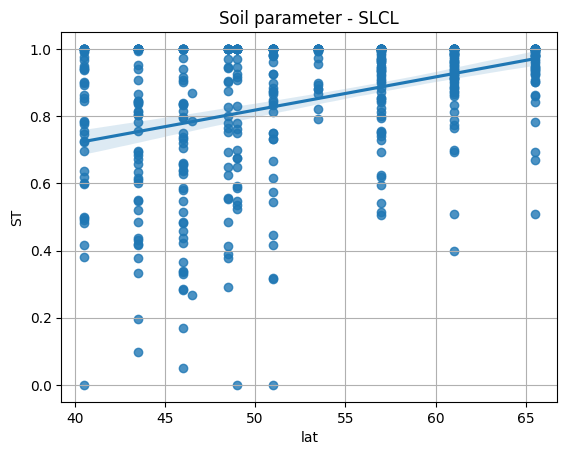

In [227]:
sns.regplot(data=soil_gdf, x='lat', y='ST')
plt.title('Soil parameter - SLCL')
plt.grid()

Text(0.5, 1.0, 'Soil parameter - SLCL')

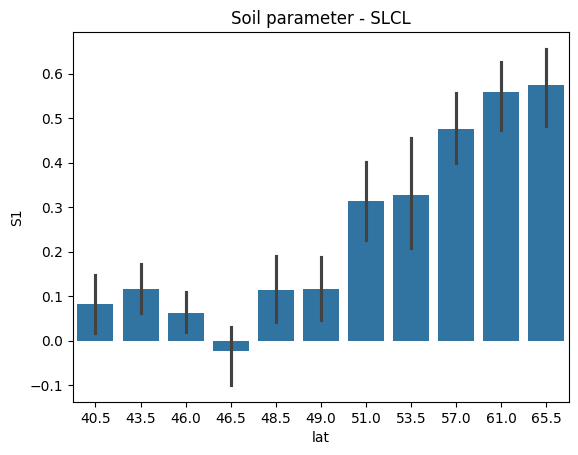

In [143]:
sns.barplot(data=soil_gdf.reset_index(), x='lat', y='S1')
plt.title('Soil parameter - SLCL')

## Merge dataset ST and yield

<Axes: >

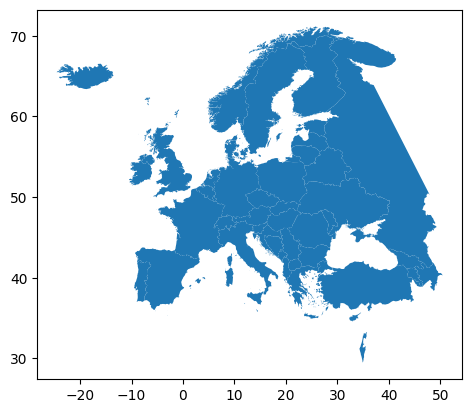

In [232]:
gdf = gpd.read_file('https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON/europe.geojson')
gdf = gdf.set_crs('EPSG:4326')
gdf.plot()

In [231]:
gdf

,FID,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,0.0,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
1,0.0,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
2,0.0,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
3,0.0,BK,BA,BIH,70,Bosnia and Herzegovina,5120,3915238,150,39,17.786,44.169,"POLYGON ((17.64984 42.88908, 17.57853 42.94382..."
4,0.0,BU,BG,BGR,100,Bulgaria,11063,7744591,150,151,25.231,42.761,"POLYGON ((27.87917 42.84110, 27.89500 42.80250..."
5,0.0,CY,CY,CYP,196,Cyprus,924,836321,142,145,33.219,35.043,"POLYGON ((33.65262 35.35410, 33.71305 35.38194..."
6,0.0,DA,DK,DNK,208,Denmark,4243,5416945,150,154,9.264,56.058,"MULTIPOLYGON (((11.51389 54.82972, 11.56444 54..."
7,0.0,EI,IE,IRL,372,Ireland,6889,4143294,150,154,-8.152,53.177,"MULTIPOLYGON (((-9.65639 53.22222, -9.66333 53..."
8,0.0,EN,EE,EST,233,Estonia,4239,1344312,150,154,25.793,58.674,"MULTIPOLYGON (((23.99083 58.10000, 23.97805 58..."
9,0.0,AU,AT,AUT,40,Austria,8245,8291979,150,155,14.912,47.683,"POLYGON ((13.83361 48.77361, 13.85806 48.77055..."


In [180]:
df_yield = pd.read_csv('../data/soybean_yield.csv')
mask = df_yield['Yield'].isna()
select=df_yield.loc[~mask]

In [181]:
gdf_yield = gpd.GeoDataFrame(data=select, crs='EPSG:4326',
                       geometry=gpd.points_from_xy(x=select.lon, y=select.lat))

In [182]:
df_sobol = soil_gdf.copy()

In [208]:
merged = gdf_yield.sjoin(soil_gdf[['ST', 'geometry']], how='left')

In [209]:
merged['ST'] = merged['ST'].interpolate(limit_direction='both')

In [219]:
df_yield.loc[~mask, 'ST'] =  merged.reset_index().drop_duplicates(subset='index')['ST']

<Axes: >

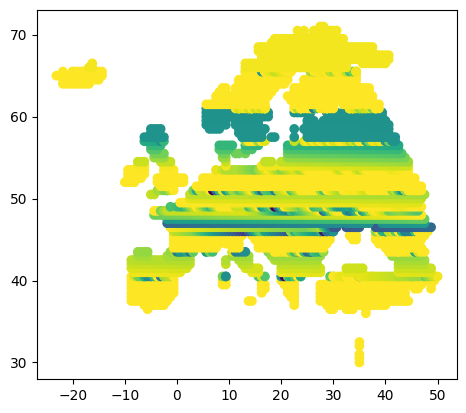

In [225]:
merged.plot(column='ST')

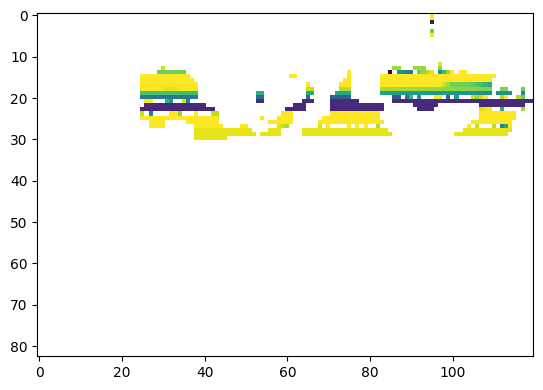

In [222]:
x=df_yield['ST'].values

plt.imshow(x.reshape(83,120))

<Axes: ylabel='Density'>

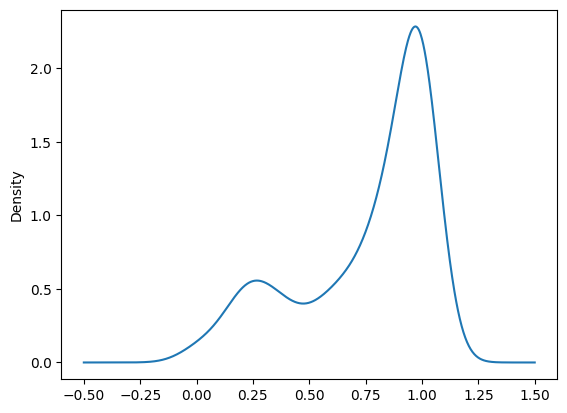

In [77]:

soil_gdf['ST'].plot(kind='kde')

In [ ]:
soil_gdf/

In [144]:
soil_gdf.explore(
    column="ST",  # make choropleth based on "BoroName" column
    tooltip="ST",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    # cmap="Set1",  # use "Set1" matplotlib colormap
    marker_kwds = {"radius":10},
    # style_kwds=dict(color="black"),  # use black outline
)

<Axes: >

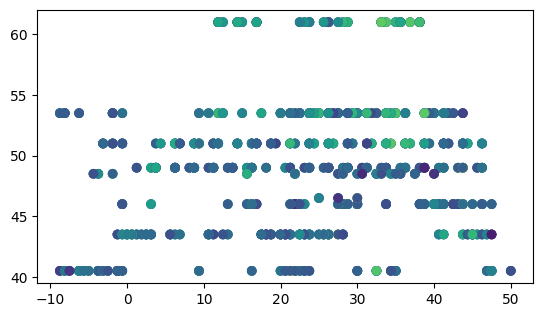

In [52]:
gdf.plot(column = 'S1')

In [5]:
df_sobol = pd.read_csv('../src/sa_task_0_result_Sobol.csv')

In [236]:
df_sobol[['lon', 'lat', 'ST']].groupby(['lon', 'lat']).mean()

ST
lon     lat           
-20.000 65.5       NaN
-18.125 65.5       NaN
-8.750  40.5  1.000000
        53.5  1.000000
-8.125  40.5  0.940850
...                ...
 46.875 40.5  0.843918
        43.5  1.000000
 47.500 40.5  0.924296
        46.0  1.000000
 50.000 40.5  0.977340

[319 rows x 1 columns]

In [253]:
3800 * 1024

3891200

In [252]:
3800 * 1024 / 3600 /24

45.03703703703704

In [240]:
lon, lat = 46.875, 40.5

mask = (df['lon']==lon) & (df['lat']==lat)

plot_df = df.loc[mask]

In [243]:
plot_df

,soil,S1,S1_conf,ST,ST_conf,soil_interaction,S2,S2_conf,lon,lat
0,SLOC,0.006473,0.142239,0.719703,0.376958,"('SLOC', 'SLCL')",-0.607939,0.818532,46.875,40.5
1,SLCL,0.409430,0.739806,1.222067,0.782148,"('SLOC', 'SLSI')",0.086177,0.445038,46.875,40.5
2,SLSI,-0.052100,0.180090,0.843918,0.360409,"('SLCL', 'SLSI')",0.102068,0.906631,46.875,40.5


<Axes: ylabel='ST'>

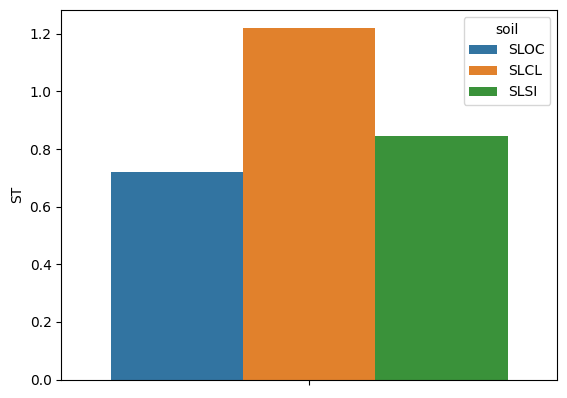

In [246]:
sns.barplot(data=plot_df, y='ST', hue='soil')